In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
cd ..

/Users/yeehonglow/Documents/Imperial/Machine-Learning-to-Track-Cloud-Computing


In [7]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import progressbar
from statsmodels.tsa.arima_model import ARIMA

SELECT_NUMBER = 1000

x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("dataset//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(pd.Series(np_cpu[x], index = x_axis))  
    
random_samples = [34, 150, 352, 365, 416, 464, 475, 501, 565, 1033, 1416, 1537, 1638, 1674, 1768, 1931, 1980, 2201, 
                  2682, 2834, 3045, 3110, 3439, 3548, 3584, 3632, 3748, 3782, 3818, 3977, 4179, 4363, 4655, 4747, 
                  4856, 4970, 5200, 5450, 5663, 6014, 6070, 6139, 6219, 6245, 6386, 6443, 6444, 6623, 6788, 6818, 
                  6915, 7090, 7174, 7191, 7297, 7364, 7530, 7737, 7868, 7993, 8023, 8117, 8123, 8181, 8205, 8278, 
                  8318, 8330, 8535, 8644, 8870, 8991, 9058, 9116, 9325, 9626, 9650, 9685, 9952, 10311, 10523, 10642,
                  10675, 10875, 10891, 10982, 11050, 11089, 11247, 11400, 11518, 11652, 11820, 11821, 11856, 11892,
                  12094, 12175, 12185, 12467]    

In [22]:
selected_machines = pd.read_csv("derived_dataset//df_updated_selected_machines.csv", header = None)
selected_machines = selected_machines[1]

# df_cpu is a dataframe with all the cpu utilisation data (columns = machine; rows = time)
# dropping last 32 lines with corrupted data

df_cpu = pd.DataFrame(np_cpu).transpose()
df_selected_machines = df_cpu[selected_machines].drop(df_cpu.tail(32).index)

In [14]:
def one_timeseries_one_model(cpu_data, start_time, end_time):
    input_order = (3,0,0)
    
    # prediction map is the dict for all predictions where the key is the machine index and the value is a list of predictions
    predictions_map = dict()
    with progressbar.ProgressBar(max_value = len(cpu_data.columns)) as bar:     
        
        for number_of_machines, cpu_index in enumerate(cpu_data):
            bar.update(number_of_machines)
            
            temp_predictions = list()
            for current_time in range (start_time, end_time):
                
                model = ARIMA(cpu_data[cpu_index].iloc[:current_time], order = input_order)
                model_fit = model.fit(disp=0)
                output = model_fit.forecast()
                yhat = output[0]
                temp_predictions.append(yhat[0])
                
            predictions_map[cpu_index] = temp_predictions
            
    return pd.DataFrame(predictions_map, columns = cpu_data.columns, index = np.arange(start_time, end_time)) 

In [23]:
test_start = 288
test_duration = 72
test_end = test_start + test_duration

test_predictions = one_timeseries_one_model(df_selected_machines, start_time = test_start, end_time = test_end)

  1% (15 of 1162) |                      | Elapsed Time: 0:01:05 ETA:   1:26:50/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
  1% (23 of 1162) |                      | Elapsed Time: 0:01:40 ETA:   1:45:23/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
  2% (27 of 1162) |                      | Elapsed Time: 0:01:55 ETA:   1:01:41/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.

 29% (344 of 1162) |######               | Elapsed Time: 0:29:45 ETA:   1:47:31/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 31% (369 of 1162) |######               | Elapsed Time: 0:32:04 ETA:   1:34:19/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 33% (391 of 1162) |#######              | Elapsed Time: 0:34:08 ETA:   1:16:33/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 34% (403 of 1162) |#######              | Elapsed Time: 0:35:14 ETA:   1:19:47/Users

 52% (615 of 1162) |###########          | Elapsed Time: 0:53:34 ETA:   0:34:53/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 55% (649 of 1162) |###########          | Elapsed Time: 0:56:22 ETA:   0:44:03/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 56% (653 of 1162) |###########          | Elapsed Time: 0:56:41 ETA:   0:37:25/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 58% (674 of 1162) |############         | Elapsed Time: 0:58:31 ETA:   1:03:30/Users

 79% (929 of 1162) |################     | Elapsed Time: 1:17:16 ETA:   0:15:06/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 80% (935 of 1162) |################     | Elapsed Time: 1:17:39 ETA:   0:15:14/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 81% (943 of 1162) |#################    | Elapsed Time: 1:18:09 ETA:   0:13:52/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 81% (951 of 1162) |#################    | Elapsed Time: 1:18:37 ETA:   0:12:59/Users

In [24]:
test_predictions

,0,22,30,76,100,114,122,144,145,155,...,12361,12372,12389,12405,12428,12430,12435,12448,12450,12462
288,0.110673,0.252208,0.277016,0.064950,0.110144,0.090460,0.331329,0.212916,0.179146,0.272236,...,0.069242,0.286908,0.177576,0.309821,0.255780,0.295691,0.185347,0.472233,0.379706,0.284725
289,0.142540,0.268201,0.296838,0.063164,0.170068,0.113967,0.333790,0.211432,0.185180,0.173861,...,0.111364,0.294130,0.188102,0.309825,0.239445,0.276769,0.222880,0.473014,0.378683,0.293078
290,0.134544,0.254614,0.287451,0.085775,0.196624,0.092829,0.334291,0.137228,0.177910,0.309527,...,0.093713,0.294090,0.125124,0.300769,0.265253,0.286206,0.321946,0.473268,0.368291,0.302052
291,0.150547,0.258377,0.290775,0.087265,0.300377,0.114692,0.336389,0.216167,0.185793,0.318013,...,0.072674,0.299064,0.116702,0.295814,0.253986,0.272039,0.329482,0.473983,0.212784,0.324812
292,0.145508,0.249702,0.289700,0.072210,0.306838,0.119839,0.337388,0.204856,0.181799,0.304779,...,0.061523,0.304886,0.179534,0.297673,0.260554,0.278982,0.335060,0.472360,0.287130,0.317303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.063963,0.195293,0.254916,0.118880,0.087695,0.180688,0.262559,0.080687,0.175506,0.151844,...,0.136988,0.155311,0.168103,0.237448,0.255620,0.202103,0.074032,0.391223,0.240934,0.078803
356,0.206849,0.196039,0.247915,0.203634,0.076670,0.203961,0.261732,0.078036,0.289258,0.159939,...,0.122114,0.158563,0.164443,0.232680,0.320239,0.225753,0.106765,0.309543,0.227637,0.079258
357,0.193775,0.194899,0.238982,0.203147,0.080577,0.202560,0.253973,0.076074,0.300149,0.149734,...,0.099398,0.151635,0.146019,0.226599,0.271012,0.225995,0.046387,0.304888,0.197838,0.081084
358,0.195866,0.178925,0.238736,0.133454,0.076763,0.196751,0.252775,0.072093,0.264834,0.168859,...,0.105447,0.154121,0.154317,0.217247,0.270936,0.203793,0.065361,0.274734,0.181010,0.074083


In [25]:
test_actual = df_selected_machines[test_start:test_end]
test_actual

,0,22,30,76,100,114,122,144,145,155,...,12361,12372,12389,12405,12428,12430,12435,12448,12450,12462
288,0.149505,0.251193,0.300213,0.046600,0.168335,0.105253,0.335028,0.217045,0.192433,0.195237,...,0.150823,0.293799,0.196636,0.307015,0.233808,0.265626,0.235616,0.477771,0.381641,0.296008
289,0.144395,0.267427,0.285633,0.066124,0.210926,0.087361,0.335315,0.118763,0.178986,0.307577,...,0.056452,0.296135,0.145772,0.289930,0.268989,0.300579,0.348700,0.477995,0.365525,0.305311
290,0.156847,0.242733,0.290685,0.069120,0.322277,0.108094,0.337735,0.229312,0.196162,0.361510,...,0.051319,0.300539,0.115550,0.290341,0.257520,0.255039,0.360745,0.478712,0.107403,0.328913
291,0.153889,0.267099,0.289250,0.055879,0.351847,0.116141,0.338594,0.230594,0.184013,0.335477,...,0.038691,0.306989,0.168448,0.304945,0.260671,0.291615,0.340510,0.476945,0.365626,0.320599
292,0.156938,0.241682,0.274308,0.042612,0.387818,0.115908,0.334937,0.255570,0.162075,0.318399,...,0.033893,0.299603,0.105063,0.340629,0.252954,0.233090,0.384661,0.474830,0.383788,0.333332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.219151,0.203033,0.244261,0.200371,0.065434,0.215991,0.259422,0.074869,0.327915,0.155607,...,0.117905,0.154987,0.171459,0.228228,0.346304,0.230802,0.106918,0.301581,0.209388,0.078103
356,0.216610,0.169003,0.234704,0.210249,0.067108,0.219446,0.250464,0.072620,0.326609,0.144835,...,0.084747,0.150635,0.152904,0.217059,0.274334,0.214445,0.051519,0.293719,0.169016,0.080144
357,0.216309,0.192502,0.236839,0.144818,0.064500,0.214111,0.249965,0.068074,0.285985,0.161294,...,0.121797,0.151641,0.155373,0.206408,0.264404,0.179995,0.051855,0.266848,0.166130,0.072368
358,0.216232,0.212647,0.232066,0.144401,0.065804,0.211981,0.247176,0.067418,0.253711,0.180185,...,0.138423,0.151208,0.156528,0.194322,0.255892,0.202188,0.102796,0.236988,0.203969,0.106135


In [26]:
# computing the mse

mse = (test_predictions - test_actual)**2
mse.mean().mean()

0.0015697816490032538

In [27]:
df_selected_machines.iloc[test_start:test_end]

,0,22,30,76,100,114,122,144,145,155,...,12361,12372,12389,12405,12428,12430,12435,12448,12450,12462
288,0.149505,0.251193,0.300213,0.046600,0.168335,0.105253,0.335028,0.217045,0.192433,0.195237,...,0.150823,0.293799,0.196636,0.307015,0.233808,0.265626,0.235616,0.477771,0.381641,0.296008
289,0.144395,0.267427,0.285633,0.066124,0.210926,0.087361,0.335315,0.118763,0.178986,0.307577,...,0.056452,0.296135,0.145772,0.289930,0.268989,0.300579,0.348700,0.477995,0.365525,0.305311
290,0.156847,0.242733,0.290685,0.069120,0.322277,0.108094,0.337735,0.229312,0.196162,0.361510,...,0.051319,0.300539,0.115550,0.290341,0.257520,0.255039,0.360745,0.478712,0.107403,0.328913
291,0.153889,0.267099,0.289250,0.055879,0.351847,0.116141,0.338594,0.230594,0.184013,0.335477,...,0.038691,0.306989,0.168448,0.304945,0.260671,0.291615,0.340510,0.476945,0.365626,0.320599
292,0.156938,0.241682,0.274308,0.042612,0.387818,0.115908,0.334937,0.255570,0.162075,0.318399,...,0.033893,0.299603,0.105063,0.340629,0.252954,0.233090,0.384661,0.474830,0.383788,0.333332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.219151,0.203033,0.244261,0.200371,0.065434,0.215991,0.259422,0.074869,0.327915,0.155607,...,0.117905,0.154987,0.171459,0.228228,0.346304,0.230802,0.106918,0.301581,0.209388,0.078103
356,0.216610,0.169003,0.234704,0.210249,0.067108,0.219446,0.250464,0.072620,0.326609,0.144835,...,0.084747,0.150635,0.152904,0.217059,0.274334,0.214445,0.051519,0.293719,0.169016,0.080144
357,0.216309,0.192502,0.236839,0.144818,0.064500,0.214111,0.249965,0.068074,0.285985,0.161294,...,0.121797,0.151641,0.155373,0.206408,0.264404,0.179995,0.051855,0.266848,0.166130,0.072368
358,0.216232,0.212647,0.232066,0.144401,0.065804,0.211981,0.247176,0.067418,0.253711,0.180185,...,0.138423,0.151208,0.156528,0.194322,0.255892,0.202188,0.102796,0.236988,0.203969,0.106135


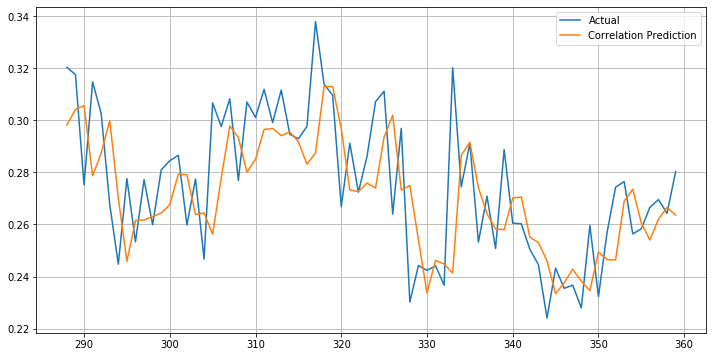

In [28]:
plt.figure(figsize= (12,6))
plt.plot(df_selected_machines[165].iloc[test_start:test_end], label = "Actual")
plt.plot(test_predictions[165], label  = "Correlation Prediction")
plt.legend()
plt.grid()

In [29]:
test1 = one_timeseries_one_model(df_selected_machines[0,22], start_time = test_start, end_time = test_end)

KeyError: (0, 22)

In [32]:
df_selected_machines[[0,22]]

,0,22
0,2.536724e-01,4.592993e-01
1,2.444094e-01,4.534344e-01
2,2.861860e-01,4.216372e-01
3,2.829586e-01,4.971580e-01
4,2.678639e-01,3.802387e-01
...,...,...
8314,3.622630e-01,2.650656e-01
8315,3.532841e-01,2.495004e-01
8316,3.367317e-01,2.553889e-01
8317,1.370566e-03,1.039760e-03
